In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

sns.set(color_codes=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/powerco-dataset/price_data.csv
/kaggle/input/powerco-dataset/client_data.csv


# DataSet: 
 1. Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
    * id = client company identifier
    * activity_new = category of the company’s activity
    * channel_sales = code of the sales channel
    * cons_12m = electricity consumption of the past 12 months
    * cons_gas_12m = gas consumption of the past 12 months
    * cons_last_month = electricity consumption of the last month
    * date_activ = date of activation of the contract
    * date_end = registered date of the end of the contract
    * date_modif_prod = date of the last modification of the product
    * date_renewal = date of the next contract renewal
    * forecast_cons_12m = forecasted electricity consumption for next 12 months
    * forecast_cons_year = forecasted electricity consumption for the next calendar year
    * forecast_discount_energy = forecasted value of current discount
    * forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
    * forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
    * forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
    * forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
    * has_gas = indicated if client is also a gas client
    * imp_cons = current paid consumption
    * margin_gross_pow_ele = gross margin on power subscription
    * margin_net_pow_ele = net margin on power subscription
    * nb_prod_act = number of active products and services
    * net_margin = total net margin
    * num_years_antig = antiquity of the client (in number of years)
    * origin_up = code of the electricity campaign the customer first subscribed to
    * pow_max = subscribed power
    * churn = has the client churned over the next 3 months

 2. Historical pricing data: variable and fixed pricing data etc
 
    * id = client company identifier
    * price_date = reference date
    * price_off_peak_var = price of energy for the 1st period (off peak)
    * price_peak_var = price of energy for the 2nd period (peak)
    * price_mid_peak_var = price of energy for the 3rd period (mid peak)
    * price_off_peak_fix = price of power for the 1st period (off peak)
    * price_peak_fix = price of power for the 2nd period (peak)
    * price_mid_peak_fix = price of power for the 3rd period (mid peak)


# Objectives
1. Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions.
2. Verify the hypothesis of price sensitivity being to some extent correlated with churn.
3. Prepare a summary or slide of key findings and add some suggestions for data augmentation

# 1. Client DataSet

In [81]:
client_path='/kaggle/input/powerco-dataset/client_data.csv'
client=pd.read_csv(client_path)
client.head(5)

,client id,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,2,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,5,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [82]:
client_df=client.drop(['client id'],axis=1)

In [83]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

**convert datetime object to datetime data type**

In [84]:
for t in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_df[t]=pd.to_datetime(client_df[t])

**check utilities activate and end year**

In [85]:
client_df['contract_activate_year']=client_df['date_activ'].dt.year
client_df['contract_end_year']=client_df['date_end'].dt.year

In [86]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_activate_year,contract_end_year
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2013,2016
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2009,2016
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2010,2016
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2010,2016
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,2010,2016


**check missing values and duplicate rows**

In [87]:
def duplicate_and_missing(dataset,dataset_name):
    print("There are",dataset.shape[0],"rows and ",dataset.shape[1],"columns in ",dataset_name)
    
    if dataset.isna().sum().sum() != 0:
        missing_values=dataset.isna().sum()[dataset.isna().sum()!=0].to_frame(name='count')
        missing_values['proportion']=missing_values['count']/len(dataset)
        
        print("There are ",dataset.isna().sum().sum()," missing values")
        print(missing_values)
        
    else:
        print("There is no missing value in",dataset_name)
        
    if dataset.duplicated().sum() !=0:
        print("There are ",dataset.duplicated().sum()," duplicate rows\n")
        
    else:
        print("There are no duplicate rows\n")

In [88]:
duplicate_and_missing(dataset=client_df,dataset_name='Client Dataset')

There are 14606 rows and  28 columns in  Client Dataset
There is no missing value in Client Dataset
There are no duplicate rows



**Now check for categorical Values**

In [89]:
cat_columns = client_df.dtypes[client_df.dtypes=='object']
cat_columns

id               object
channel_sales    object
has_gas          object
origin_up        object
dtype: object

In [90]:
def describe_categorical(dataset):
    cat_columns=dataset.dtypes[dataset.dtypes=='object'].index.tolist()
    if len(cat_columns) !=0:
        print("Categorical Columns are ",cat_columns)
        for cat in cat_columns:
            des_frame=dataset[[cat]].value_counts().reset_index(name="count")
            des_frame['proportion']=des_frame['count']/len(dataset)
            print(des_frame)
    else:
        print("There is no categorical value in the dataset.")

In [91]:
describe_categorical(dataset=client_df)

Categorical Columns are  ['id', 'channel_sales', 'has_gas', 'origin_up']
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d      1    0.000068
1      ab250252dfaded1c9a54834f9c829b43      1    0.000068
2      ab32c3a8d93c88b485499566526cb34d      1    0.000068
3      ab3392ec2bfd3605624f31d3c6828c21      1    0.000068
4      ab346731fef5aa291919ea43e45af5a7      1    0.000068
...                                 ...    ...         ...
14601  55091aace7bd0fadd194f46cb4886fea      1    0.000068
14602  550b8d2f9c298abd8f05fca3bc1a13c4      1    0.000068
14603  5514b18508f378a39f41657554aa72e3      1    0.000068
14604  551cb1b1faf72259c2c182dedec12c98      1    0.000068
14605  ffff7fa066f1fb305ae285bb03bf325a      1    0.000068

[14606 rows x 3 columns]
                      channel_sales  count  proportion
0  foosdfpfkusacimwkcsosbicdxkicaua   6754    0.462413
1                           MISSING   3725    0.255032
2  lmkebamcaaclubfxadlmueccx

By observing the above values, we can say that the origin_up and channel_sales values are not undestandable.
Thus we convert these by encoded data into numeric data by label encoding

In [92]:
label_encoder=LabelEncoder()
client_df['channel_sales']=label_encoder.fit_transform(client_df['channel_sales'])
client_df['origin_up']=label_encoder.fit_transform(client_df['origin_up'])

In [93]:
int_columns = client_df.dtypes[client_df.dtypes=='int']
float_columns = client_df.dtypes[client_df.dtypes=='float']

if len(int_columns)+len(float_columns) !=0:
    print("columns are: \n",int_columns+float_columns)


columns are: 
 channel_sales                     NaN
churn                             NaN
cons_12m                          NaN
cons_gas_12m                      NaN
cons_last_month                   NaN
contract_activate_year            NaN
contract_end_year                 NaN
forecast_cons_12m                 NaN
forecast_cons_year                NaN
forecast_discount_energy          NaN
forecast_meter_rent_12m           NaN
forecast_price_energy_off_peak    NaN
forecast_price_energy_peak        NaN
forecast_price_pow_off_peak       NaN
imp_cons                          NaN
margin_gross_pow_ele              NaN
margin_net_pow_ele                NaN
nb_prod_act                       NaN
net_margin                        NaN
num_years_antig                   NaN
origin_up                         NaN
pow_max                           NaN
dtype: object


In [94]:
def describe_numeric(dataset):
    int_columns=dataset.dtypes[dataset.dtypes=='int'].index.tolist()
    float_columns=dataset.dtypes[dataset.dtypes=='float'].index.tolist()
    
    if len(int_columns) + len(float_columns) !=0:
        print("Numerical variable columns are ",int_columns+float_columns)
        
        if len(int_columns) !=0:
            for i in int_columns:
                desc_frame=dataset[[i]].value_counts().reset_index(name="count")
                desc_frame['Proportion']=desc_frame['count']/len(dataset)
                print(desc_frame)
        print(dataset[int_columns+float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}))
     
        
        print("There is no numerical values in the dataset.")

In [95]:
describe_numeric(dataset=client_df)

Numerical variable columns are  ['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'forecast_discount_energy', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn', 'contract_activate_year', 'contract_end_year', 'forecast_cons_12m', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']
   channel_sales  count  Proportion
0              4   6754    0.462413
1              0   3725    0.255032
2              5   1843    0.126181
3              7   1375    0.094139
4              2    893    0.061139
5              6     11    0.000753
6              1      3    0.000205
7              3      2    0.000137
       cons_12m  count  Proportion
0             0    117    0.008010
1       2882597     27    0.001849
2       3329244     24    0.001643
3       1743025     18    0.001232
4       3926060     18   

In [96]:
client_df[client_df.dtypes[client_df.dtypes=='datetime64[ns]'].index.to_list()].describe(datetime_is_numeric=True)

,date_activ,date_end,date_modif_prod,date_renewal
count,14606,14606,14606,14606
mean,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488
min,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00
25%,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00
50%,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00
75%,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


# 2. Price DataSet

In [97]:
price_path='/kaggle/input/powerco-dataset/price_data.csv'
price=pd.read_csv(price_path)
price.head(5)

,data,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,1,038af19179925da21a25619c5a24b745,1/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,2,038af19179925da21a25619c5a24b745,2/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,3,038af19179925da21a25619c5a24b745,3/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,4,038af19179925da21a25619c5a24b745,4/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,5,038af19179925da21a25619c5a24b745,5/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0


In [98]:
price_df=price.drop(['data'],axis=1)

In [99]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,1/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,3/1/2015,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,4/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,5/1/2015,0.149626,0.0,0.0,44.266931,0.0,0.0


In [100]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [101]:
price_df['price_date']=pd.to_datetime(price_df['price_date'])

In [102]:
duplicate_and_missing(dataset=price_df,dataset_name='price')

There are 193002 rows and  8 columns in  price
There is no missing value in price
There are no duplicate rows



In [103]:
describe_categorical(dataset=price_df)

Categorical Columns are  ['id']
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d     12    0.000062
1      ab07311332ad017c071947aa1747bf9e     12    0.000062
2      aab99b3be145225dbff8551b256da9e0     12    0.000062
3      aac9a198cee4c2eb9d975ca21b38f00b     12    0.000062
4      aacb5f6ab9d32c8cc9e58c505b028d24     12    0.000062
...                                 ...    ...         ...
16091  83cf18b07114e495ae8b7fb235e45ee2      8    0.000041
16092  223a98d3832ece78cbf279a194868b54      8    0.000041
16093  bf89f2d8c1b133a134fd93603cb4c947      7    0.000036
16094  c5dcd5c506e565aaabffa29bc1ec0a37      7    0.000036
16095  15b36e47cf04bf151e3f4438d12672e5      7    0.000036

[16096 rows x 3 columns]


In [104]:
describe_numeric(dataset=price_df)

Numerical variable columns are  ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
                    min        max       mean     median
price_off_peak_var  0.0   0.280700   0.141027   0.146033
price_peak_var      0.0   0.229788   0.054630   0.085483
price_mid_peak_var  0.0   0.114102   0.030496   0.000000
price_off_peak_fix  0.0  59.444710  43.334477  44.266930
price_peak_fix      0.0  36.490692  10.622875   0.000000
price_mid_peak_fix  0.0  17.458221   6.409984   0.000000
There is no numerical values in the dataset.


In [105]:
price_df['price_date'].describe(datetime_is_numeric=True)

count                           193002
mean     2015-06-16 12:50:49.933161216
min                2015-01-01 00:00:00
25%                2015-04-01 00:00:00
50%                2015-07-01 00:00:00
75%                2015-10-01 00:00:00
max                2015-12-01 00:00:00
Name: price_date, dtype: object

In [106]:
client_df.head(4)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_activate_year,contract_end_year
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,4,43.648,1,2013,2016
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,2,13.800,0,2009,2016
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,2,13.856,0,2010,2016
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,2,13.200,0,2010,2016


**Now, let's get various insights from data.**

In [107]:
#show a bar chart of the customers who changes their providers(churn)

def bar_chart_cust_percent_distribution(df,target,if_sort=False,gap_bar_level=0,figsize=(10,6)):
    
    plot_data=df[[target]].value_counts().reset_index(name='count')
    plot_data['percent']=plot_data['count']/plot_data['count'].sum()
    
    fig=plt.figure(figsize=figsize)
    ax=sns.barplot(data=plot_data,x=target,y='percent')
    
    for p in ax.patches:
        x=p.get_x()+p.get_width()/2
        y=p.get_height()+gap_bar_level
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100),xy=(x,y),ha='center')
    ax.margins(y=0.1)
    

In [108]:
def stacked_bar_percent_churn(df,target,if_sort=False,figsize=(10,6)):
    
    plot_data=df.groupby([target,'churn']).size().reset_index(name='count')
    plot_data=plot_data.pivot(index=target,columns='churn',values='count').fillna(0)
                                        
    plot_data=plot_data.div(plot_data.sum(axis=1),axis=0)
    
    if if_sort:
        plot_data=plot_data.sort_values(by=[0])
    ax=plot_data.plot(kind='bar',rot=False,stacked=True,figsize=figsize)
    plt.legend(['Churn No','Churn Yes'],loc='upper center')
    
    for p in ax.patches:
        percentage='{:.2f}%'.format(p.get_height()*100)
        if percentage != '0.0%':
            x=p.get_x()+p.get_width()/2
            y=1-p.get_height()
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

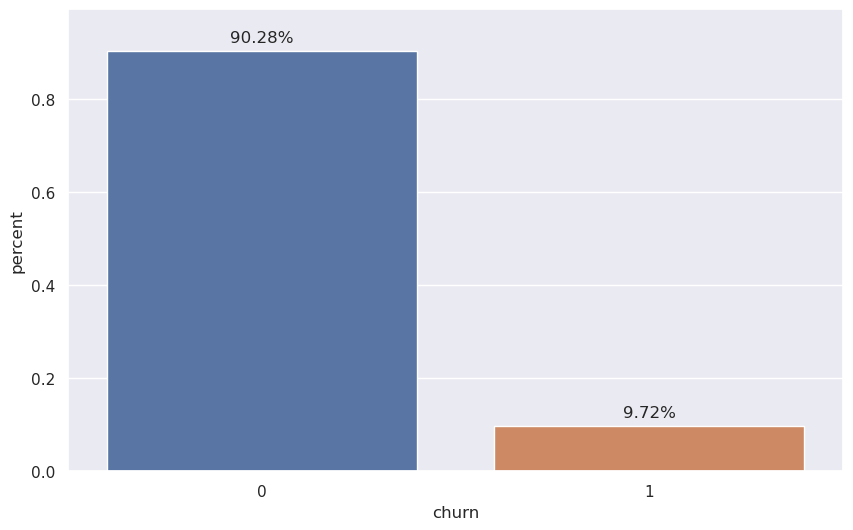

In [109]:
bar_chart_cust_percent_distribution(df=client_df,target='churn',gap_bar_level=0.02)

So this insights shows that 9.72% customers shifted to another distributer.

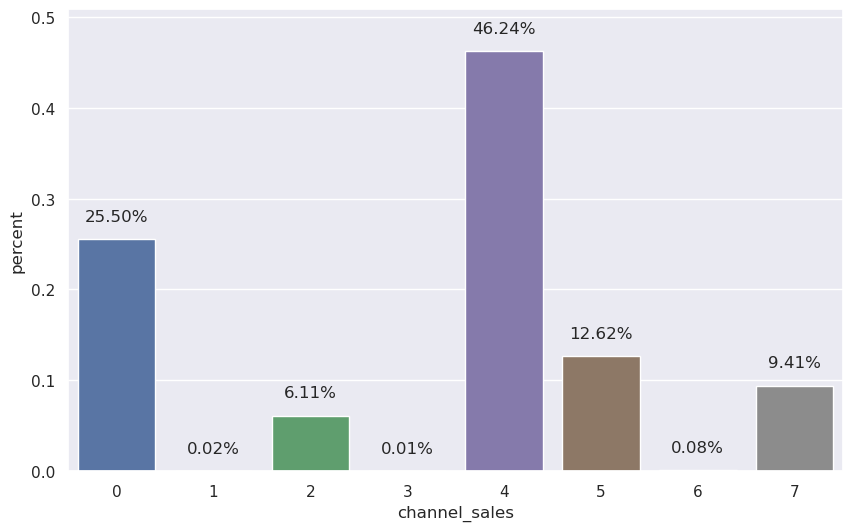

In [110]:
bar_chart_cust_percent_distribution(df=client_df,target='channel_sales',if_sort=True,gap_bar_level=0.02)

Here it showss that type 4 has most channel_sales of 46.25%.

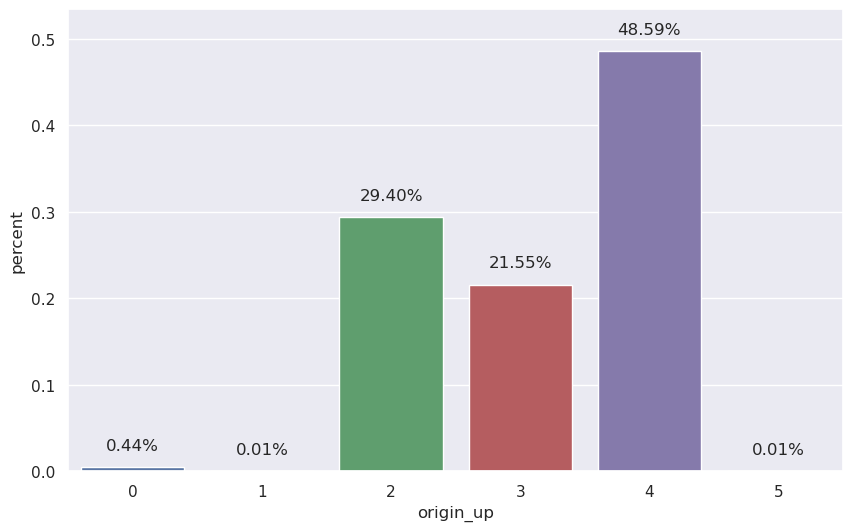

In [111]:
bar_chart_cust_percent_distribution(df=client_df,target='origin_up',gap_bar_level=0.02)

Type 4,the customer first subscribed and most subscribed electricity campaign.

Stacked Bar Chart for the distribution of the churning customers.

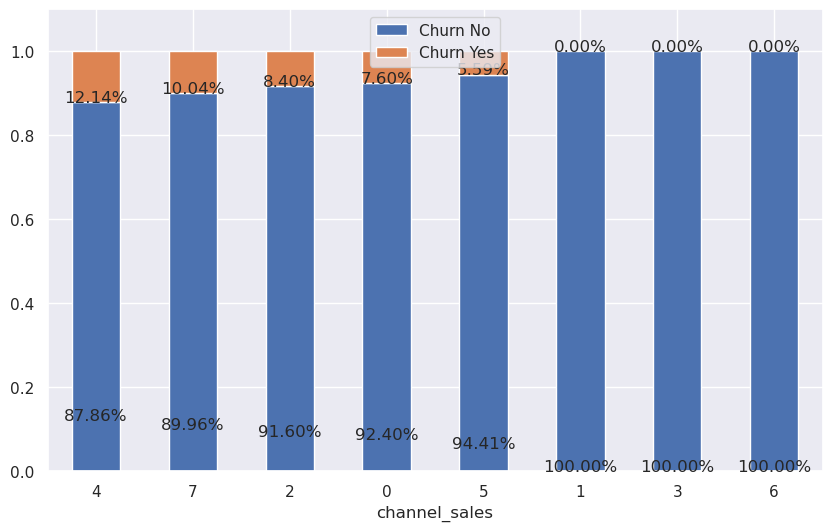

In [112]:
stacked_bar_percent_churn(df=client_df,target='channel_sales',if_sort=True)

The Proportion of churning customers from range 5.59%-12.14% from different channel_sales

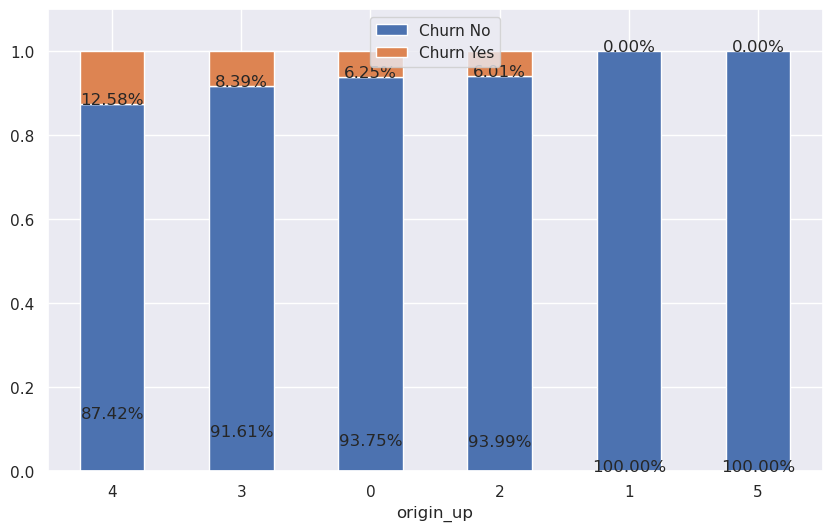

In [113]:
stacked_bar_percent_churn(df=client_df,target='origin_up',if_sort=True)

Customers suscribed first after diffn caimpaign, shows their churning ranges from 6.01%-12.58% 

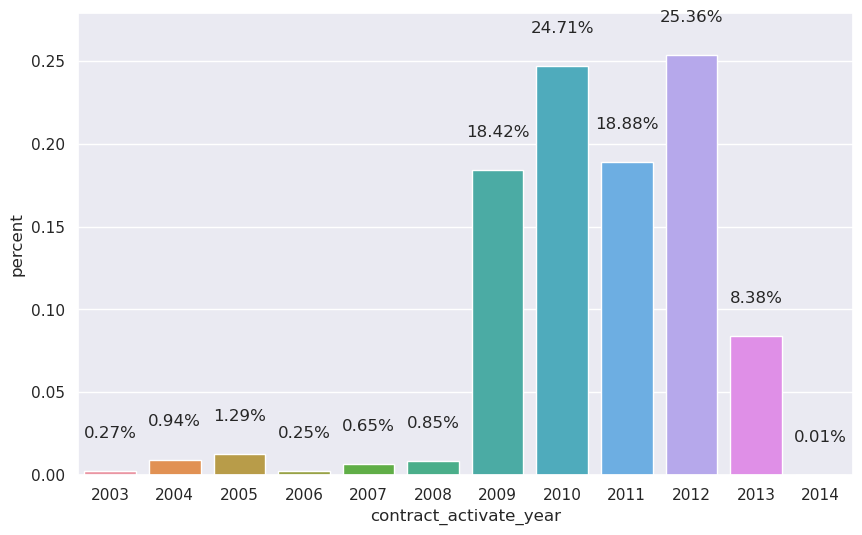

In [114]:
bar_chart_cust_percent_distribution(df=client_df,target='contract_activate_year',gap_bar_level=0.02)

In different years 2003-2014, the year 2009-2013 in which customer did not churn or switch to other providers.

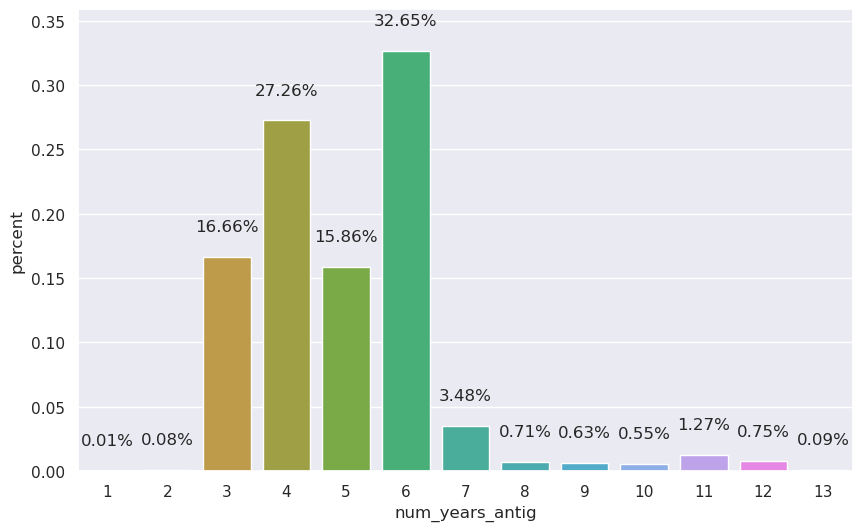

In [115]:
bar_chart_cust_percent_distribution(df=client_df,target='num_years_antig',gap_bar_level=0.02)

Customers mainly stayed between 3-7 years. it seems newer customer are likely to switch to another providers.

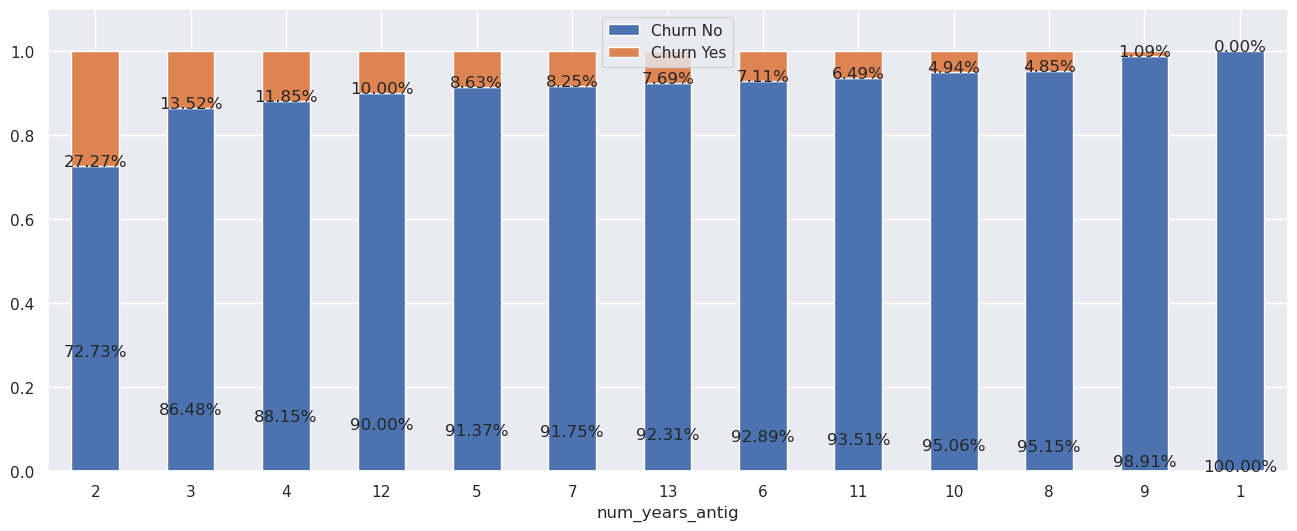

In [116]:
stacked_bar_percent_churn(df=client_df,target='num_years_antig',if_sort=True,figsize=(16,6))

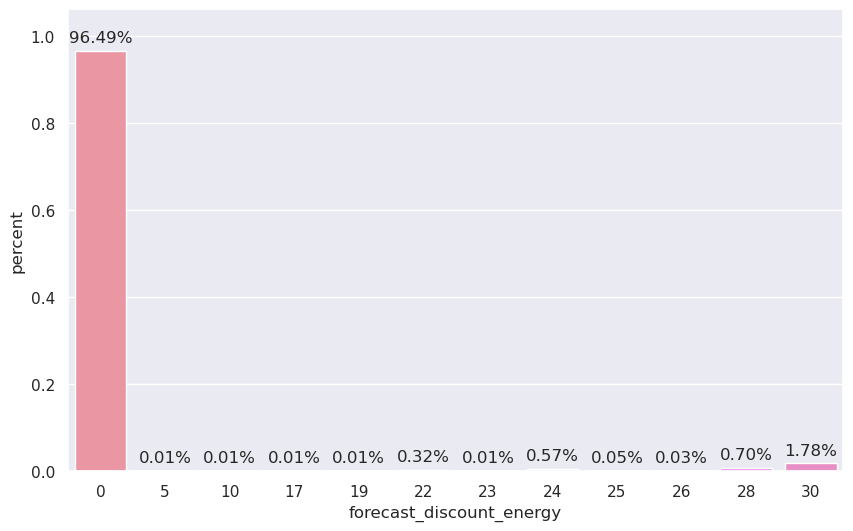

In [117]:
bar_chart_cust_percent_distribution(df=client_df,target='forecast_discount_energy',gap_bar_level=0.02)

Currently Forecast discount value is nearly zero.

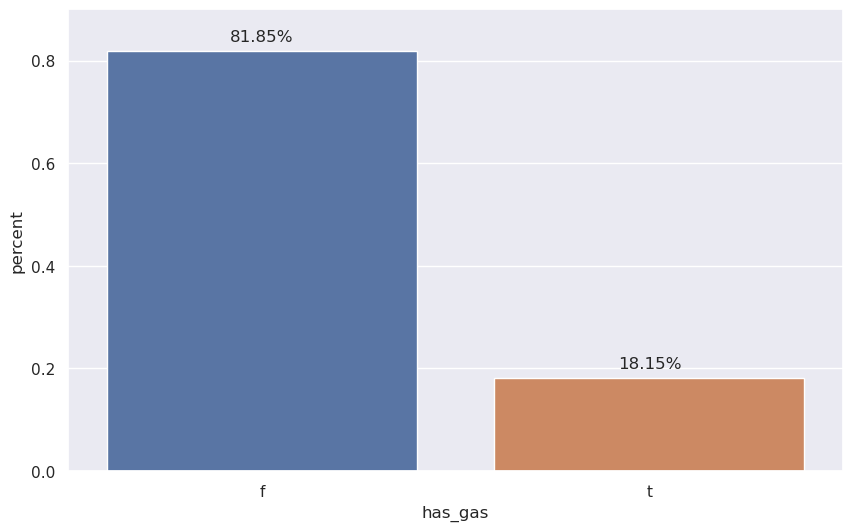

In [118]:
bar_chart_cust_percent_distribution(df=client_df,target='has_gas',gap_bar_level=0.02)

Just 18.15% of the total customers also has the gas connection.

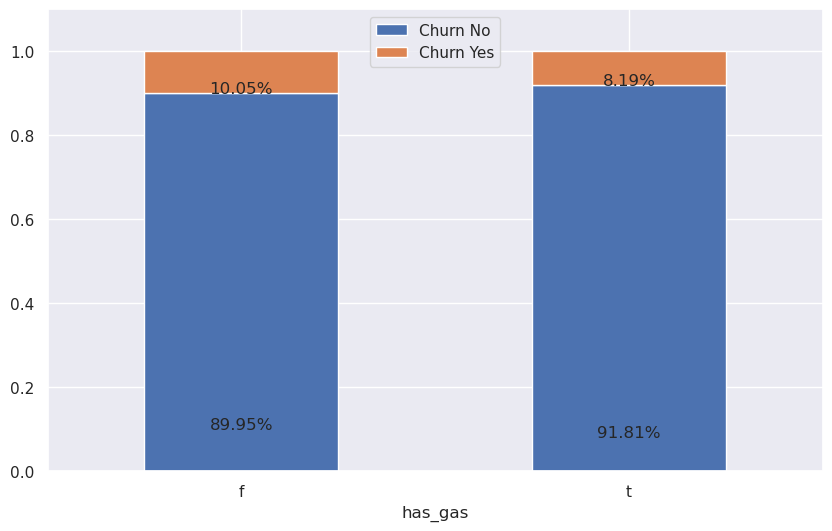

In [119]:
stacked_bar_percent_churn(df=client_df,target='has_gas',if_sort=True,figsize=(10,6))

Electricity customers churns more than gas customers.

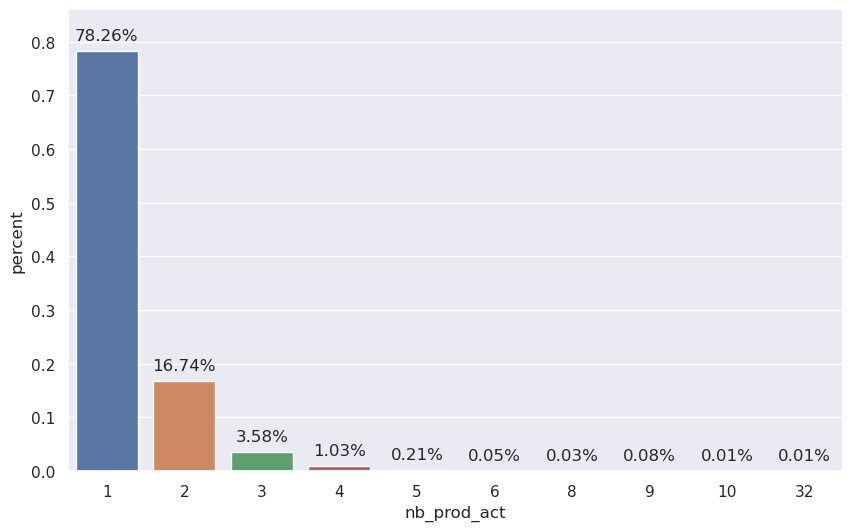

In [120]:
bar_chart_cust_percent_distribution(df=client_df,target='nb_prod_act',gap_bar_level=0.02)

In [121]:
def hist_chart_cust_churn(df, target, figsize=(16,6), if_churn=True,bins=100):
    fig = plt.figure(figsize=figsize)
    
    if if_churn:
        ax=sns.histplot(data=df,x=target,bins=bins,hue='churn')
    else:
        ax=sns.histplot(data=df,x=target,bins=bins)

Histogram of energy consumption feature

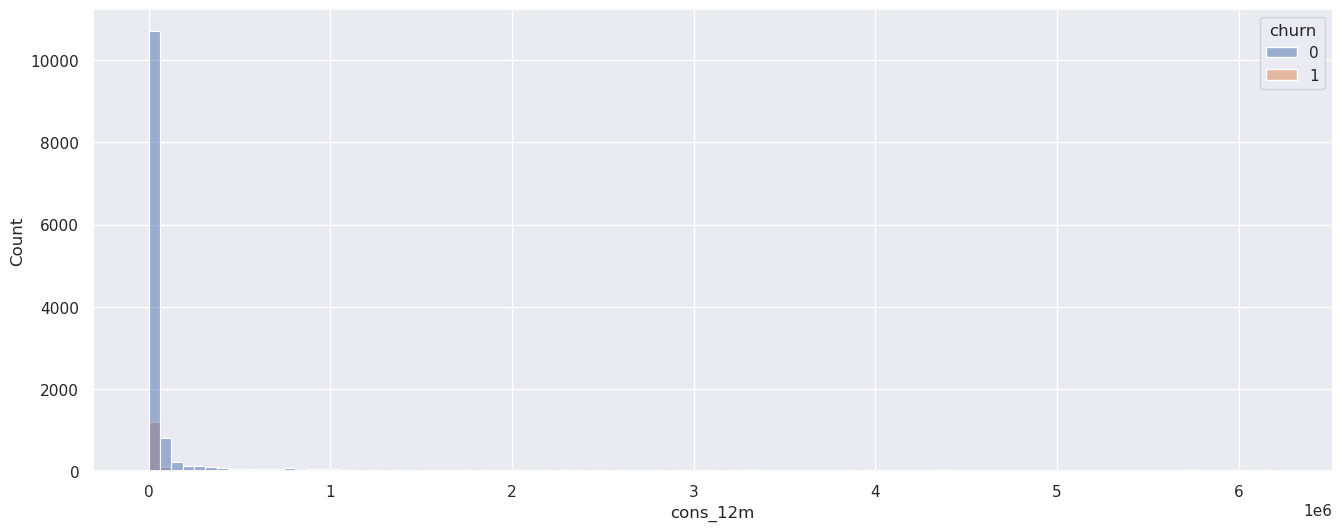

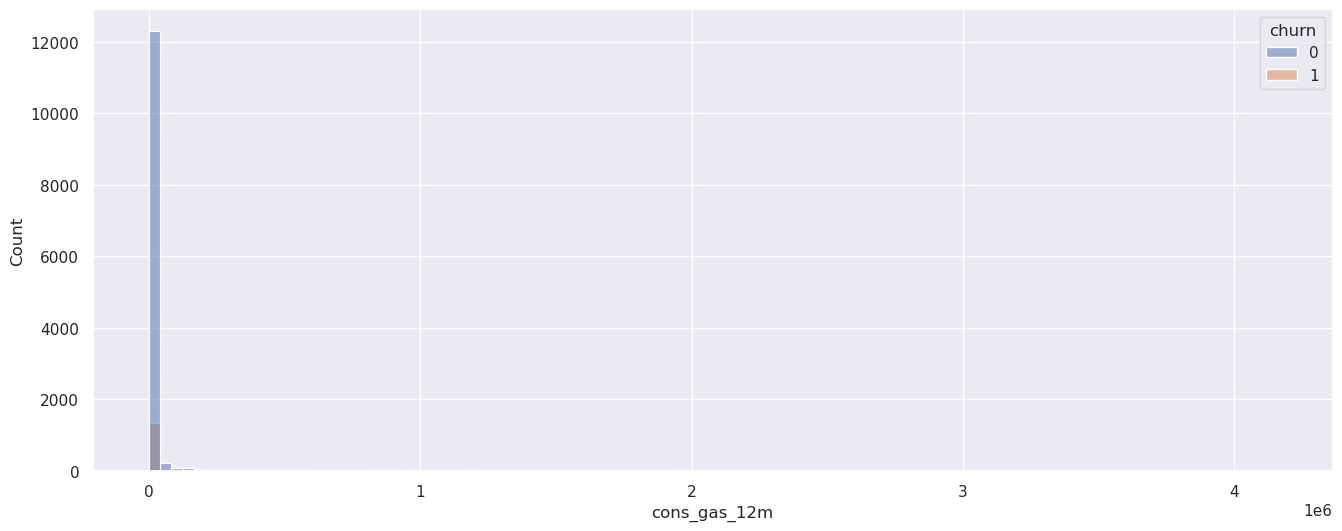

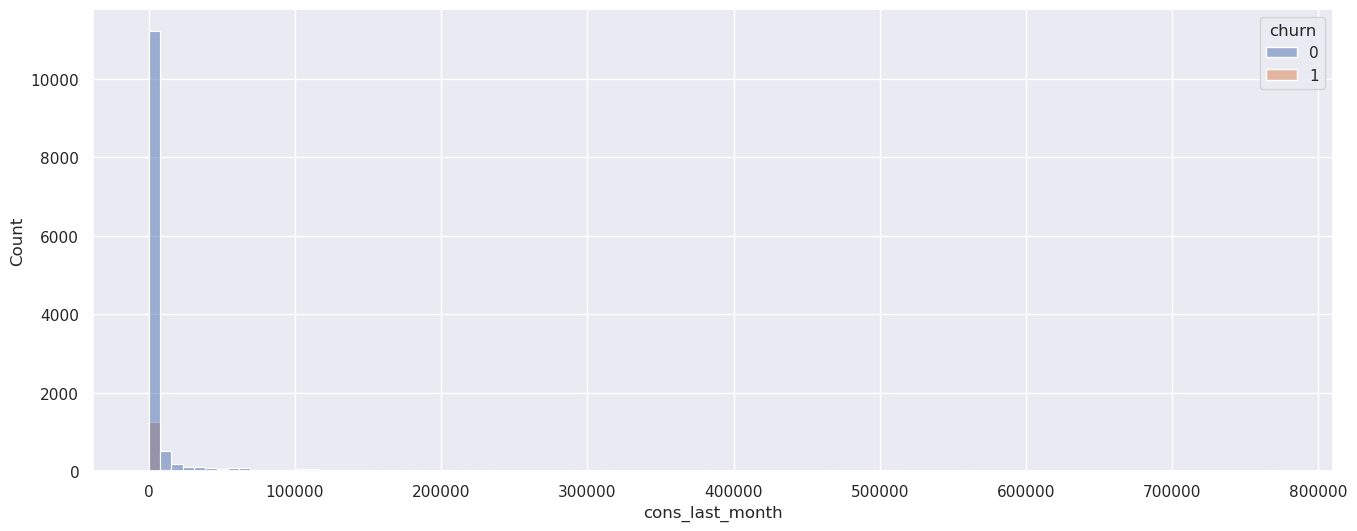

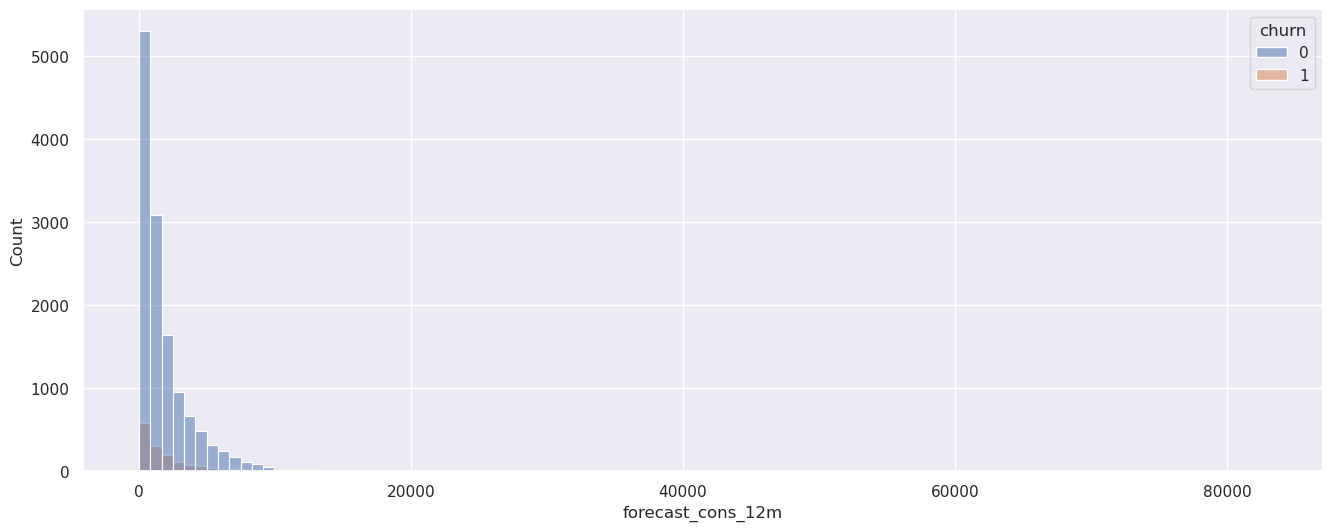

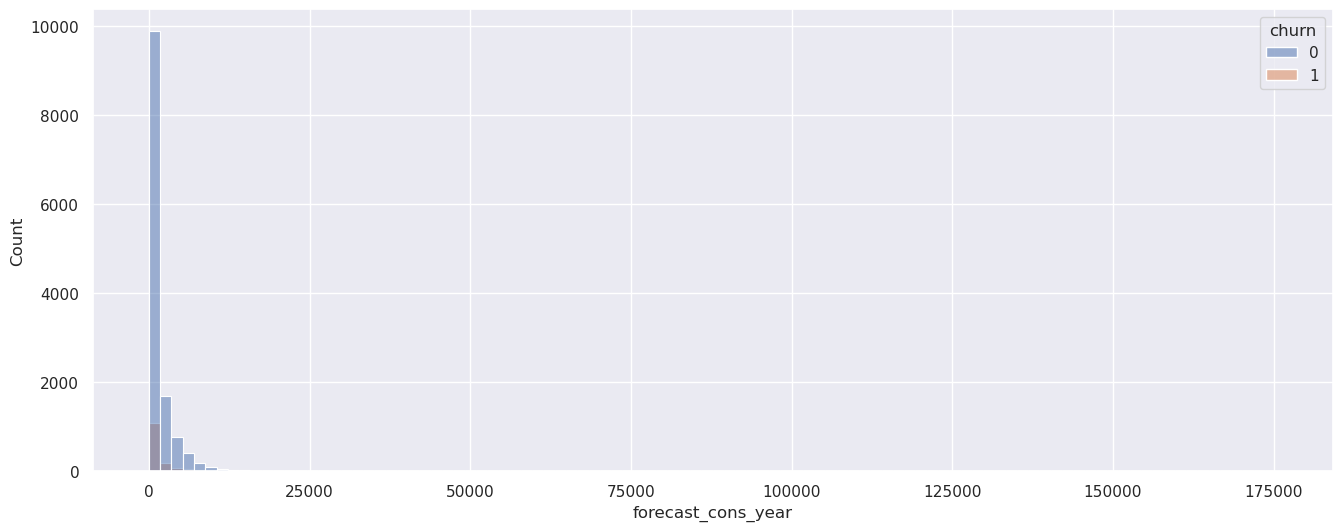

In [122]:
for col in ['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year']:
    hist_chart_cust_churn(df=client_df,target=col)

Histograms of diffferent price features of the price dataset

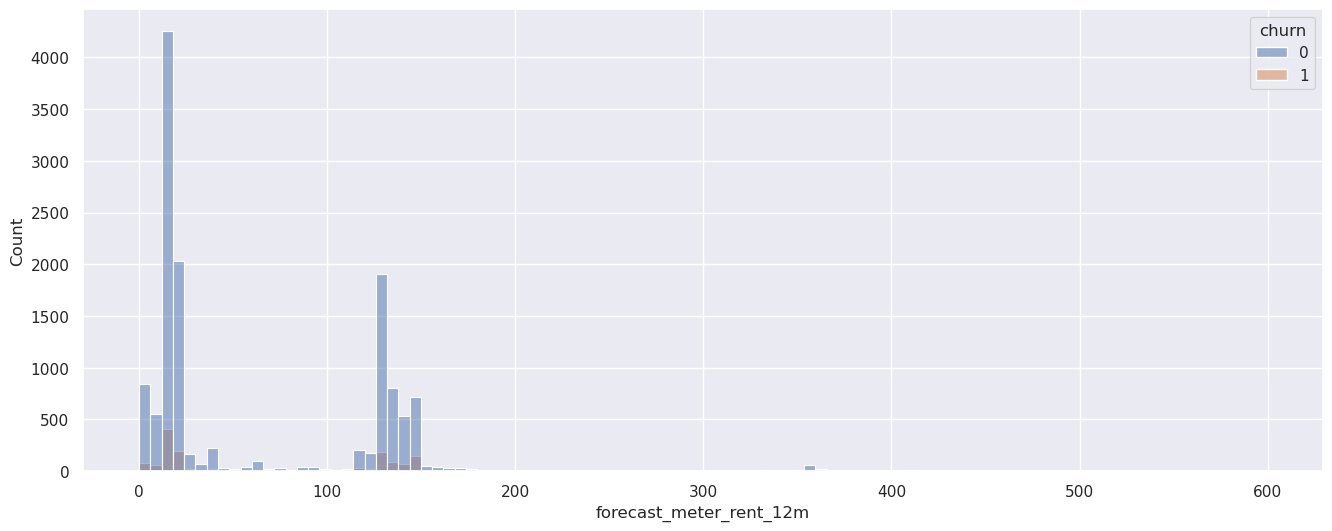

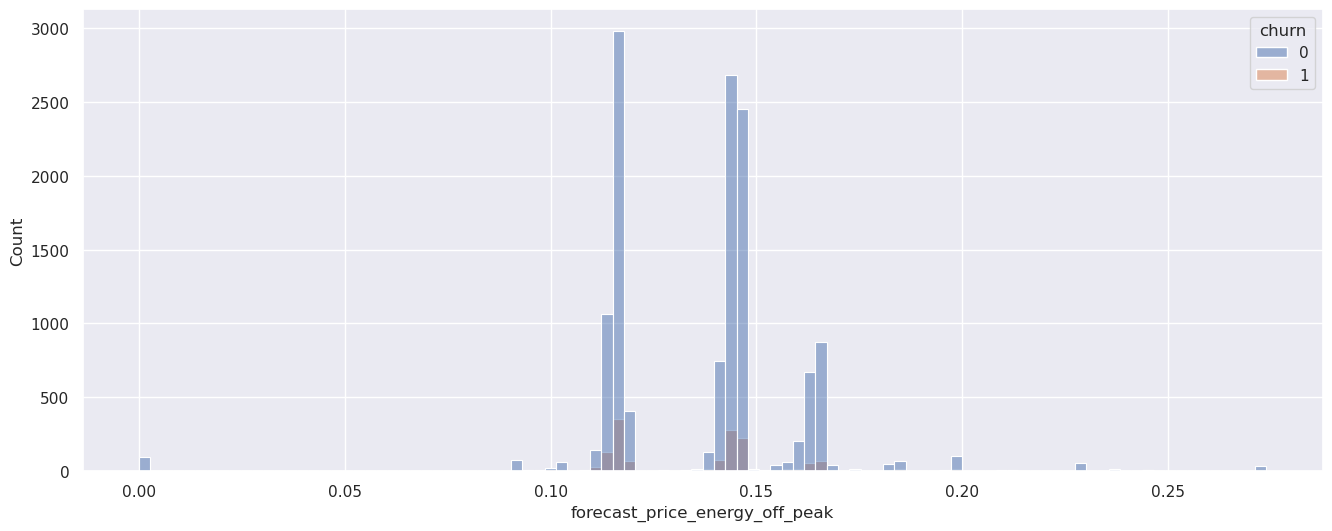

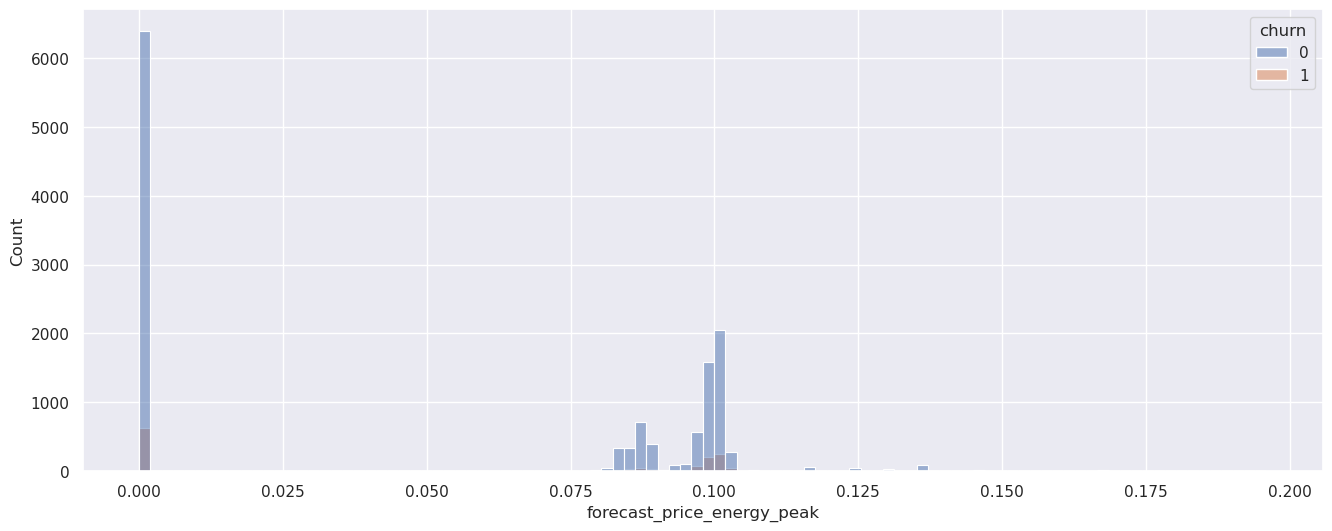

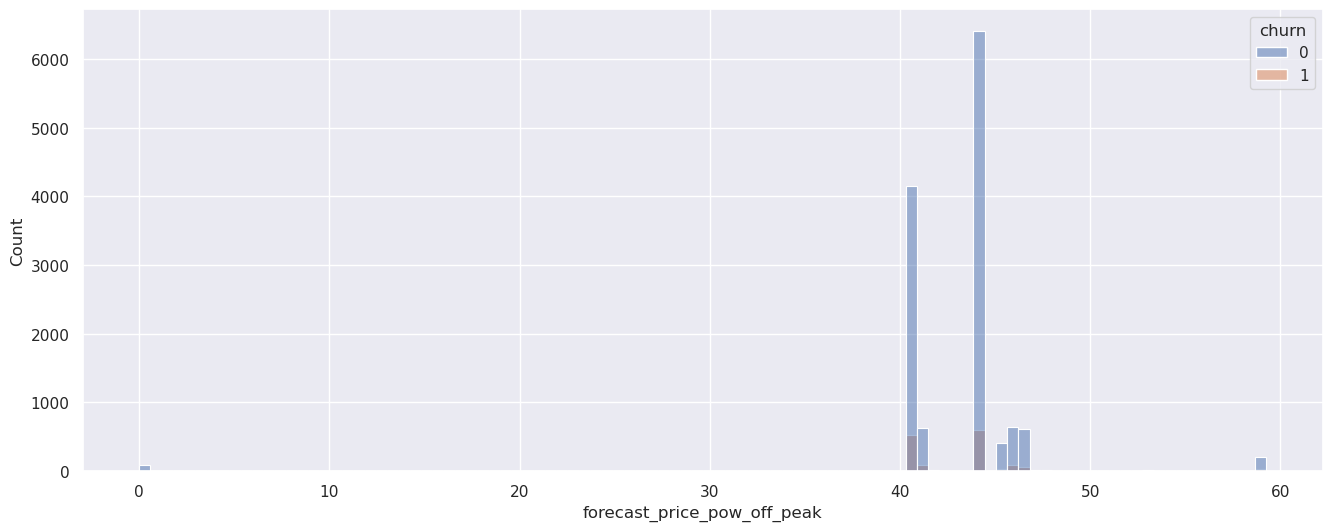

In [123]:
for i in ['forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak']:
    hist_chart_cust_churn(df=client_df,target=i)

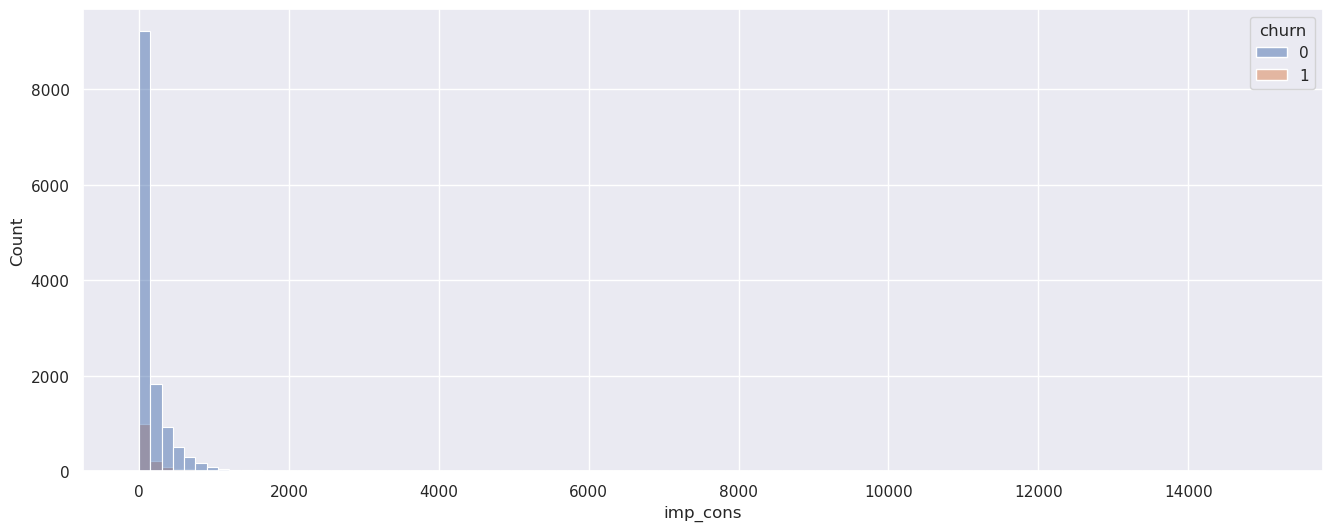

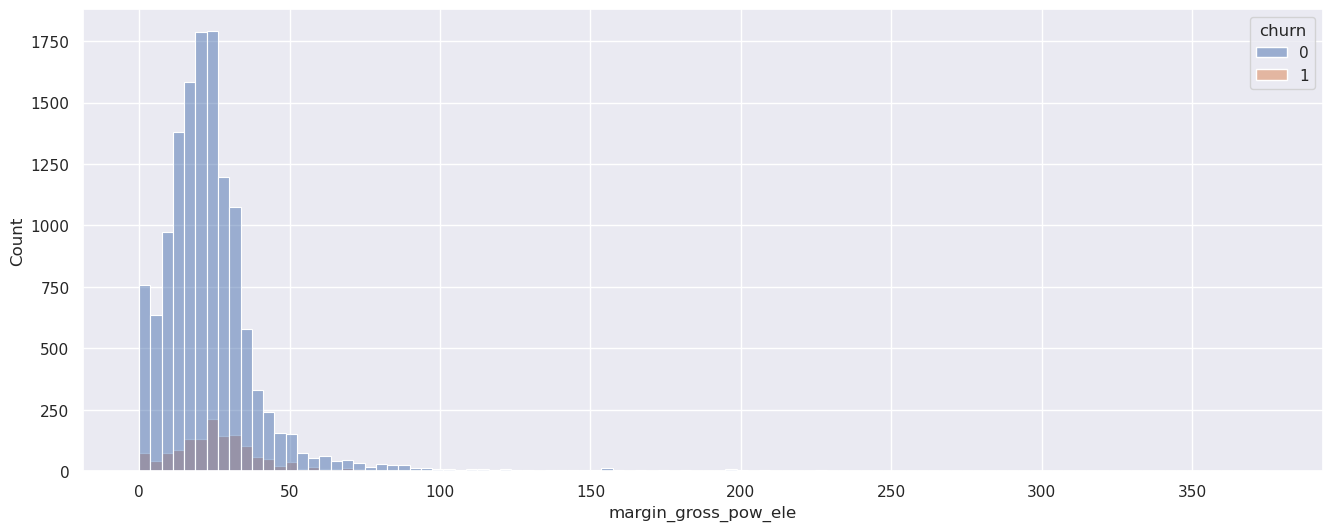

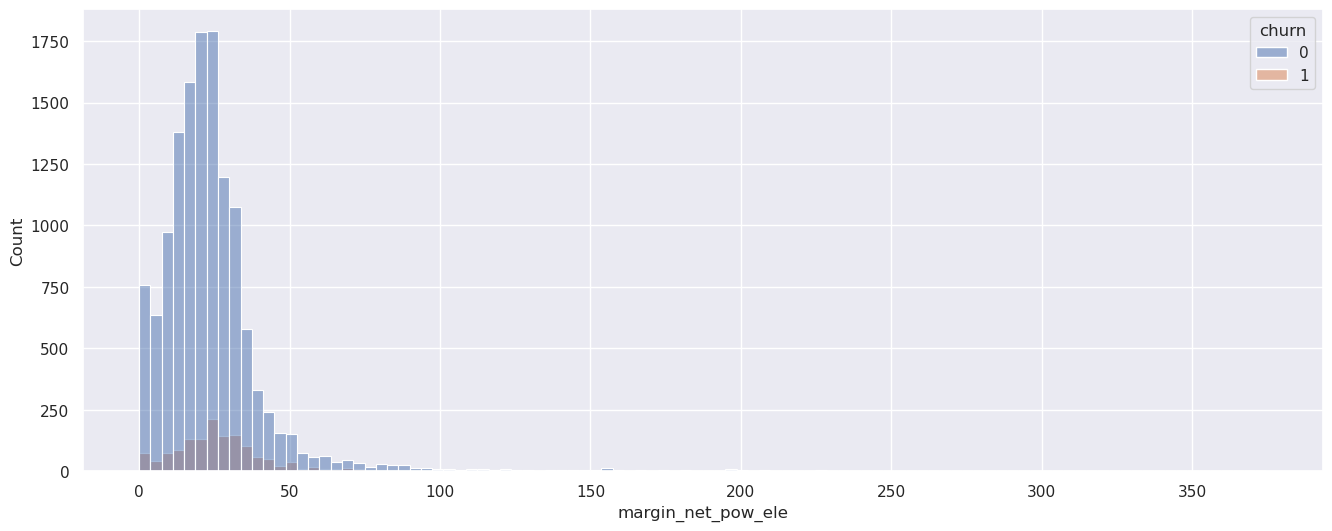

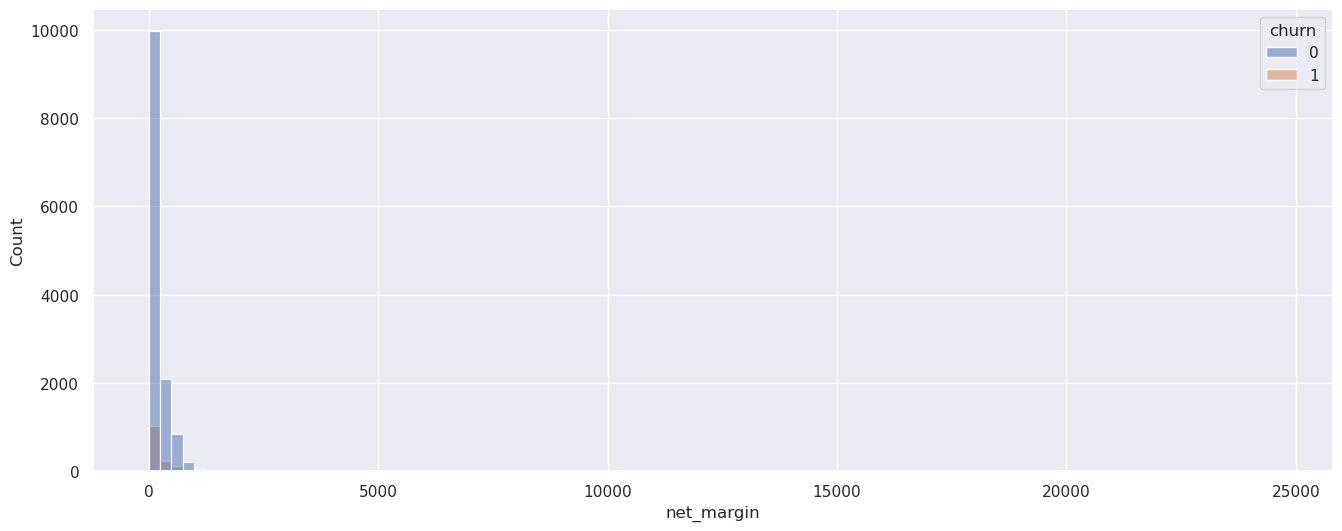

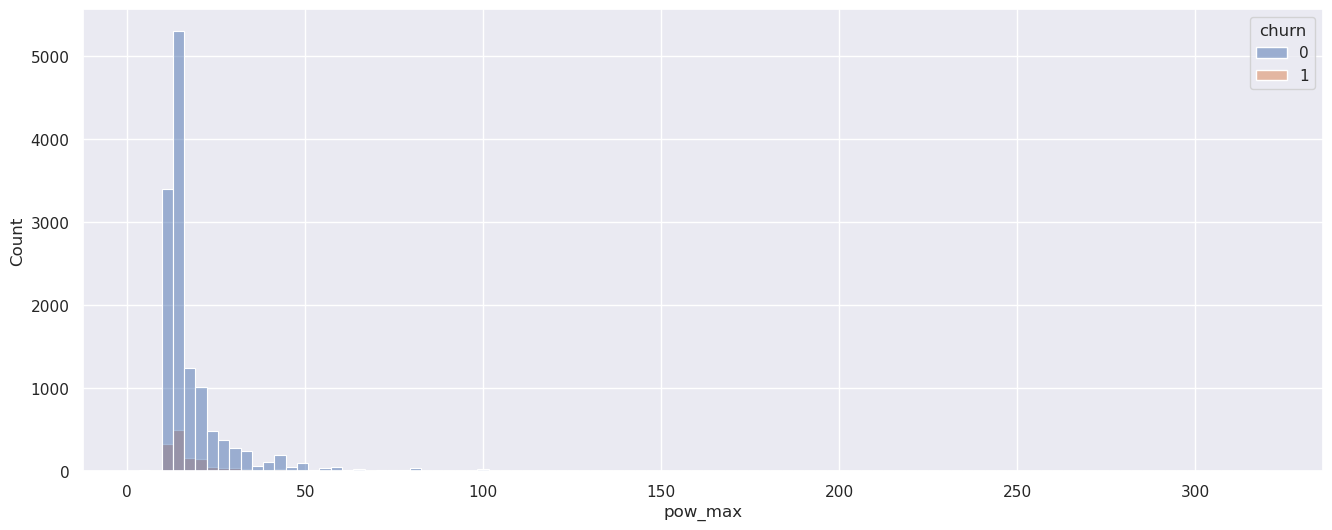

In [124]:
for i in ['imp_cons','margin_gross_pow_ele','margin_net_pow_ele','net_margin','pow_max']:
    hist_chart_cust_churn(df=client_df,target=i)

# Now let's check for the price dataset.
# 

In [125]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [126]:
price_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

We can see not all customers have the same number of price records. The vast majority of customers have 12 price reocrds and very few customers has less than 12 records.
Most of the customers transaction is between 12 month price records.

In [127]:
price_df['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64